## Missing Values- Feature Engineering

What are the different types of Missing Data?
####### Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
import pandas as pd 

In [4]:
df=pd.read_csv("F:\\program\\dataset\\titanic_train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


####### Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [9]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()


0.7710437710437711

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [11]:

df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing At Random(MAR)
#### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

eg:Men---hide their salary
Women---hide their age

#### Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [14]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [17]:
median=df.Age.median()
median

28.0

In [18]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

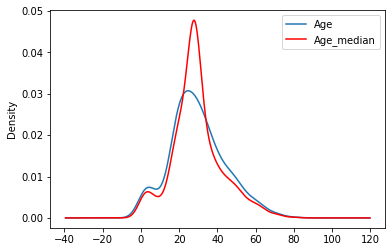

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
1.Easy to implement(Robust to outliers)
2.Faster way to obtain the complete dataset 
#### Disadvantages
1.Change or Distortion in the original variance
2.Impacts Correlation

#### Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [1]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
df['Age'].dropna().sample()

677    18.0
Name: Age, dtype: float64

In [13]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [14]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [24]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##it will have random sample to fill nan 
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [25]:
median=df.Age.median()

In [26]:
median


28.0

In [27]:
impute_nan(df,"Age",median)

In [28]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<IPython.core.display.Javascript object>

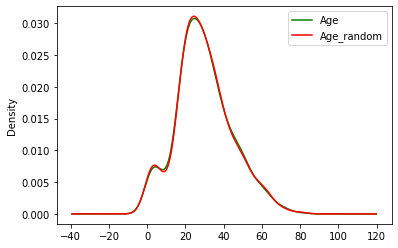

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages
 Easy To implement
 
 There is less distortion in variance
##### Disadvantage
 Every situation randomness won't work
 
### Capturing NAN values with a new feature
 It works well if the data are not missing completely at random

In [34]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [36]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [38]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [39]:
df.Age.median()

28.0

In [43]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [46]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


<IPython.core.display.Javascript object>

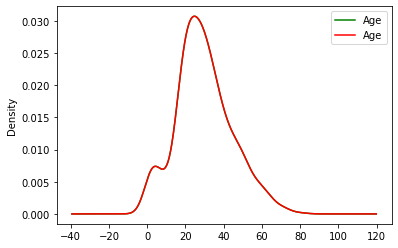

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='green')
df.Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


###### Advantages
Easy to implement

Captures the importance of missing values
###### Disadvantages
Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation
End of Distribution Imputation If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [48]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()


<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


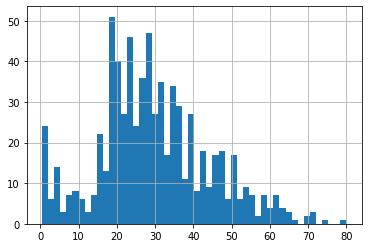

In [56]:
df.Age.hist(bins=50)

In [58]:
extreme=df.Age.mean()+3*df.Age.std()

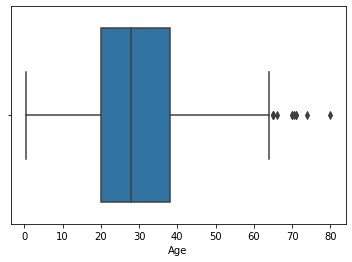

In [57]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [59]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [60]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [61]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


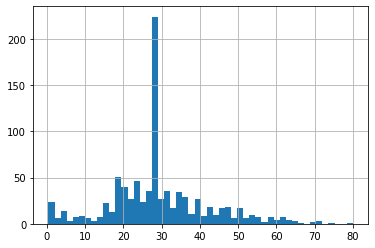

In [62]:
df['Age'].hist(bins=50)

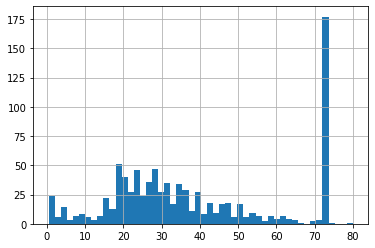

In [63]:
df['Age_end_distribution'].hist(bins=50)

sns.boxplot('Age_end_distribution',data=df)

##### Advantage
.easy to implement
.captures the importance of missingess if there is one
#### Disadvantage
.distort the distrubution of the variable

### Arbitrary Value Imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [65]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv', usecols=["Age","Fare","Survived"])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [66]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

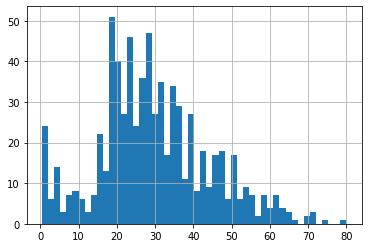

In [67]:
df['Age'].hist(bins=50)

#### Advantages
-Easy to implement

-Captures the importance of missingess if there is one
#### Disadvantages
-Distorts the original distribution of the variable

-If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

-Hard to decide which value to use


### How To Handle Categroical Missing Values

##### Frequent Category Imputation
Frequent category imputation—or mode imputation—consists of replacing all occurrences of missing values (NA) within a variable with the mode, or the most frequent value. This method is suitable for numerical and categorical variables, but in practice, we use this technique with categorical variables.

In [68]:
df=pd.read_csv('F:\\program\\dataset\\train.csv')

<IPython.core.display.Javascript object>

In [69]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df=pd.read_csv('F:\\program\\dataset\\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [72]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [73]:
 df.isnull().sum()

BsmtQual        35
FireplaceQu    599
GarageType      71
SalePrice        0
dtype: int64

In [80]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.027800
GarageType     0.056394
FireplaceQu    0.475774
dtype: float64

### compute the frequency with every feature

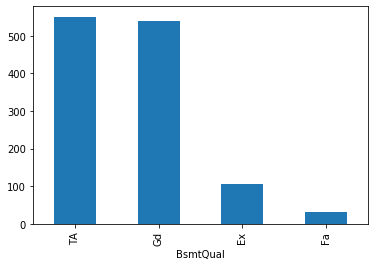

In [83]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

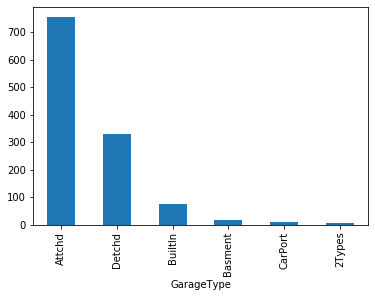

In [84]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

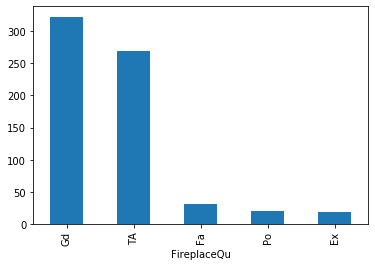

In [85]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [90]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [91]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [92]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [93]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
    Easy To implement
    Fater way to implement 
#### Disadvantages
    Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
    It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [94]:
df=pd.read_csv('F:\\program\\dataset\\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [95]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [96]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [97]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [101]:
frequent=df['BsmtQual'].mode()[0]

In [102]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [103]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [104]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [105]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


###### Suppose if you have more frequent categories, we just replace NAN with a new category

In [106]:
df=pd.read_csv('F:\\program\\dataset\\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [107]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [108]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [109]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [110]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [111]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [112]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Handle Categorical Features
#### One Hot Encoding

In [120]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv', usecols=["Sex"])
df.head()

<IPython.core.display.Javascript object>

,Sex
0,male
1,female
2,female
3,female
4,male


In [121]:
pd.get_dummies(df).head()

<IPython.core.display.Javascript object>

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [116]:
pd.get_dummies(df,drop_first=True).head()


<IPython.core.display.Javascript object>

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [122]:
df=pd.read_csv('F:\\program\\dataset\\titanic_train.csv',usecols=['Embarked'])

<IPython.core.display.Javascript object>

In [123]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [124]:
pd.get_dummies(df).head()

<IPython.core.display.Javascript object>

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [125]:
df.dropna(inplace=True)

In [126]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [127]:
pd.get_dummies(df,drop_first=False).head()

<IPython.core.display.Javascript object>

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [128]:
pd.get_dummies(df,drop_first=True).head()

<IPython.core.display.Javascript object>

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### Onehotencoding with many categories in a feature

In [129]:
df=pd.read_csv('F:\\program\\dataset\\mercedesbenz.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

<IPython.core.display.Javascript object>

In [130]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [131]:
for i in df.columns:
    print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
aw     16
l      16
ad     14
b      11
k      11
au     11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ab      1
ac      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
ab      3
q       3
d       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z    

In [132]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
aw     16
l      16
ad     14
b      11
k      11
au     11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ab      1
ac      1
Name: X0, dtype: int64

In [133]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [134]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [135]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [136]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [137]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [138]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [139]:
lst_10.append('X1')

In [140]:

df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
